# an example of Maximum Likelihood Estimation

## number of heads in N tosses

$$Y=\sum_{i=1}^N X_i$$

where $X_i$ is Bernoulli random variables
$$X_i = \left\{ \begin{eqnarray} 
1  ,  \text{ith toss results in head}\\
0  ,  \text{otherwise} \\
\end{eqnarray}
\right.
$$

## unknown PDF of Y
$$ f(y; \mu, v) = \frac{1}{\sqrt{2\pi v}} \exp (\frac{-(y-\mu)^2}{2v})$$

## observation Yi
$$ Y_i = y_i, (i=1,2,...,n) $$

## likelihood L
$$L(y_1, y_2, ..., y_n, \mu, v) = \Pi_{i=1}^{n} f(y_i) $$

## estimation
L is maximized when 
$$\mu = \frac{1}{n} \sum y_i $$
$$v = \frac{1}{n} \sum (y_i - \mu)^2 $$
https://en.wikipedia.org/wiki/Maximum_likelihood_estimation

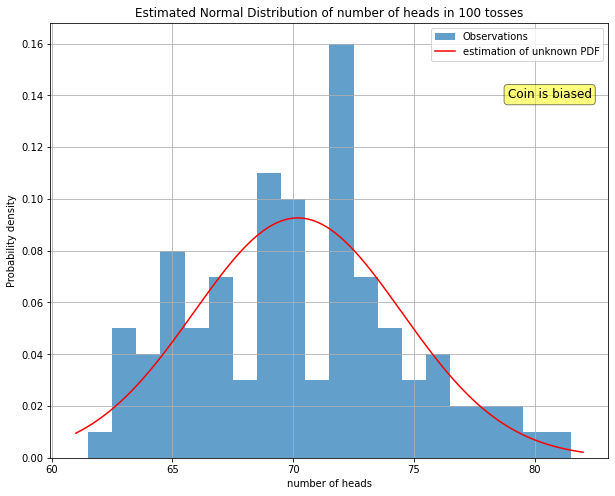

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters 
N = 100 # 100 tosses for each experiment
P = 0.7 # bias of the coin, i.e. probability that the toss results in the head

# Define the toss function
def toss(p):
    if np.random.random() <= p:
        result = 1
    else: 
        result = 0
    return result

# Simulate the experiments and collect observations:
def simulation(num_experiments):
    observations = []
    for experiment in range(num_experiments):
        num_heads = 0
        for i in range(N):
            num_heads += toss(P) 
        observations.append(num_heads)
    return observations

# observe the result of simulation
num_experiments = 100
observations = simulation(num_experiments)

# Maximum Likelihood Estimation
mean_obs = np.mean(observations)
std_dev_obs = np.std(observations)

# Create x values for the normal distribution
x = np.linspace(min(observations) - 1, max(observations) + 1, 1000)

# Calculate the corresponding y values using the normal distribution
y = norm.pdf(x, mean_obs, std_dev_obs)

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10,8))

# Plot the histogram
ax.hist(observations, bins=np.arange(min(observations) - 0.5, max(observations) + 1.5, 1), 
        density=True, alpha=0.7, label='Observations')

# Plot the normal distribution
ax.plot(x, y, label='estimation of unknown PDF', color='red')

# Add axis labels and title
ax.set_xlabel('number of heads')
ax.set_ylabel('Probability density')
ax.set_title("Estimated Normal Distribution of number of heads in 100 tosses")

# Add the message "coin is biased"
ax.text(0.97, 0.85, "Coin is biased", fontsize=12, transform=ax.transAxes, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

ax.legend()
ax.grid(True)

plt.show()

